<a href="https://colab.research.google.com/github/tomonari-masada/course2025-stats1/blob/main/EM_for__zero_inflated_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM algorithm for Zero-inflated Poisson model

# 準備

In [10]:
import numpy as np
from scipy.stats import poisson
from scipy.special import expit
import seaborn as sns

rng = np.random.default_rng(seed=42)

# データの合成

In [12]:
n_samples = 1000

prob_true = 0.7
mu_true = 5

x = np.zeros(n_samples)
for i in range(n_samples):
    if rng.uniform() > prob_true:
        x[i] = poisson.rvs(mu=mu_true, random_state=rng)
    else:
        x[i] = 0

<Axes: ylabel='Count'>

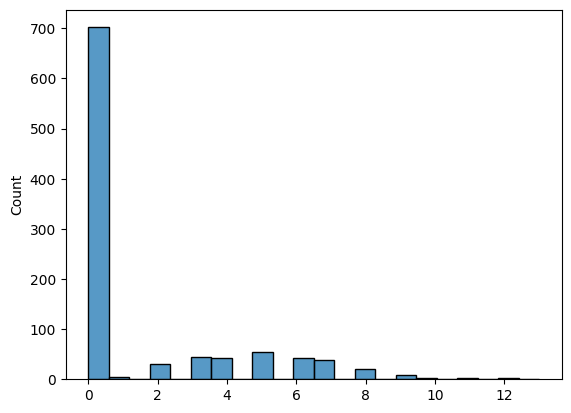

In [13]:
sns.histplot(x)

# M step

In [18]:
def M_step(x, q):
    prob_guessed = q.sum() / len(q)
    mu_guessed = ((1 - q) * x).sum() / (1 - q).sum()
    return prob_guessed, mu_guessed

# E step

In [20]:
def E_step(x, prob_guessed, mu_guessed):
    q = prob_guessed * (x == 0.0)
    q = q / (q + (1 - prob_guessed) * poisson.pmf(x, mu_guessed))
    return q

# 初期化

In [23]:
q = expit(rng.normal(size=n_samples))
q[:10]

array([0.35232137, 0.54195258, 0.70148612, 0.27150905, 0.36671761,
       0.5446735 , 0.94570369, 0.57471745, 0.83290557, 0.76953247])

# EMアルゴリズム

In [24]:
for _ in range(10):
    prob_guessed, mu_guessed = M_step(x, q)
    q = E_step(x, prob_guessed, mu_guessed)
    print(f"{prob_guessed:.3f}, {mu_guessed:.2f}")

0.500, 1.53
0.576, 3.58
0.688, 4.85
0.700, 5.04
0.700, 5.05
0.700, 5.05
0.700, 5.05
0.700, 5.05
0.700, 5.05
0.700, 5.05
